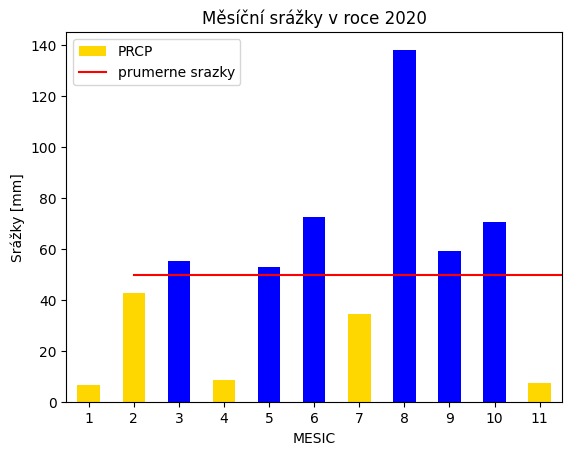

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
df['DATE']  = pd.to_datetime(df['DATE'])
df = df.loc[df['NAME']=='RUZYNE']
df['ROK'] = df['DATE'].dt.year
df['MESIC'] = df['DATE'].dt.month
df = df.loc[df['ROK']==2020]

# tady vznika series
df = df.groupby(by='MESIC',as_index=False)['PRCP'].sum()
df['prumerne srazky'] = df['PRCP'].mean()
#df['barva'] = df['PRCP'].apply(lambda x: 'red' if x>df['prumerne srazky'].mean() else 'blue')
df['barva'] = df.apply(lambda x: 'blue' if x['PRCP']>x['prumerne srazky'] else 'gold',axis=1)

# VARIANTA1
# sloupcovy graf
df.plot(kind='bar',x='MESIC', y='PRCP',title='Měsíční srážky v roce 2020', xlabel='Měsíc', ylabel='Srážky [mm]',color=df['barva'])
df.plot(kind='line',x='MESIC', y='prumerne srazky',color='red',ax=plt.gca())

# # VARIANTA2
# plt.bar(df['MESIC'],df['PRCP'],label='Srážky [mm]')
# plt.plot(df['MESIC'],df['prumerne srazky'],color='red',label='Průměrné srážky')
sucho = ax.axhspan(0, 30, facecolor='brown', alpha=0.5)

# # Přidání anotace "Povodně" k hodnotě na ose x
# ax.annotate('Povodně', xy=(7, df['PRCP'][7]), xytext=(7, df['PRCP'][5]+10),  # xy je bod, kde přidáme anotaci, xytext je pozice textu
#             arrowprops=dict(facecolor='black', arrowstyle='->'))


# # Přidání legendy, která zahrnuje axhspan
# handles, labels = ax.get_legend_handles_labels()
# handles.append(sucho)
# labels.append('Sucho')
# ax.legend(handles=handles, labels=labels)

# ax.text(0,40,"Sucho",color='brown')

# plt.savefig('srazky.pdf', format='pdf', dpi=300, bbox_inches='tight')